Upload files to Google colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Load data

In [2]:
import pandas as pd
normalized_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/basal_norm_transposed.csv', index_col=0)
normalized2_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GSE57297_basal_properly_transposed.csv', index_col=0)
labels_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/subtype_sample id_label.csv')
significant_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GEO_both ids_sign_DEGs_subtypes.csv')

Check head of these files

In [3]:
#normalized_df.head()
normalized2_df.head()
#significant_df.head()
#labels_df.head()

,HEBP1,KCNE4,BPIFA3,LOC100129869,IRG1,SNAR-G2,LOC100506844,CKLF,MGST2,CLK1,...,XLOC_008895,ROBO1,CHRNA4,HYDIN2,OR2J3,XLOC_009404,SIK1,HMGXB4,WDR63,XLOC_007557
GSM1378981,10.566261,7.736310,3.709674,4.664900,4.561795,12.654282,7.834377,5.209299,9.995162,6.637280,...,4.724695,5.170354,4.403739,4.786722,3.803926,3.547284,8.325681,8.854151,3.894693,3.804742
GSM1378998,11.440562,6.631869,4.186634,4.685010,4.601741,10.719882,7.567227,4.204756,10.073148,8.365583,...,4.175372,5.974421,4.950545,4.469342,4.982502,4.636595,7.793706,8.653830,5.856910,4.842274
GSM1379008,10.874440,7.526332,3.810002,5.028661,4.296805,11.915633,8.553195,6.187959,10.271136,7.983288,...,4.924382,5.738772,4.201300,4.543334,3.687899,4.577200,9.106410,8.294286,4.079478,4.156181
GSM1379006,12.316688,11.531485,3.010592,4.371006,4.606967,12.113443,7.873559,4.798010,10.829527,7.811109,...,4.570609,4.438758,4.697671,4.871020,4.751543,3.914534,8.205065,8.868963,4.992293,4.789775
GSM1378987,11.914929,9.158481,2.937357,4.404370,4.594040,7.996126,8.619112,4.737636,10.748328,6.947373,...,4.943801,5.699687,4.809107,4.856458,3.928971,3.916491,7.328303,8.992637,4.334701,4.282078


Filter for Significant Genes

In [4]:
sig_genes = significant_df['GeneSymbol'].unique()
# Filter sig_genes to only include those present in normalized_df columns
common_genes1 = [gene for gene in sig_genes if gene in normalized_df.columns]
common_genes2 = [gene for gene in sig_genes if gene in normalized2_df.columns]

In [5]:
filtered_df1 = normalized_df[common_genes1]
filtered_df2 = normalized2_df[common_genes2]

In [6]:
filtered_df1.to_csv('filtered_normalized1.csv')
filtered_df2.to_csv('filtered_normalized2.csv')

In [7]:
#filtered_df1.head()
filtered_df2.head()

,FOXA1,SERPINB5,NEU1,SPDEF,FERMT1,FANCB,RHOB,HORMAD1,KCNN4,UGT8,...,XLOC_l2_015800,XLOC_l2_015821,LOC388796,VGLL3,XLOC_l2_006862,PDGFRA,OXR1,MFI2,XLOC_005748,SYT8
GSM1378981,4.220412,11.417005,11.688603,7.849757,4.793388,5.472191,10.333810,8.255264,13.038087,7.507829,...,5.861985,5.701947,5.973012,7.681602,10.531806,12.102486,6.181824,7.896350,5.511738,10.615888
GSM1378998,9.103023,7.741739,11.161492,9.389587,5.095051,5.856385,10.389212,4.962849,13.098053,8.452941,...,10.833727,8.659823,5.660905,7.735036,9.869272,10.294148,4.779327,7.459181,5.940120,6.580437
GSM1379008,4.048135,10.215828,11.426160,5.180874,6.043415,6.102550,9.848893,7.682544,10.810069,7.962172,...,6.860849,7.245946,5.480566,7.586947,9.170365,10.314521,3.661747,5.681053,6.864531,8.056655
GSM1379006,12.879896,7.821743,11.993632,11.384868,4.155272,5.314250,11.908049,4.481667,9.322033,5.086928,...,4.258186,4.279216,5.721488,6.917755,8.357672,8.358989,3.952404,5.301133,4.917912,6.811043
GSM1378987,12.610278,7.595605,11.994497,12.417463,4.084476,5.242014,12.068573,5.145819,9.333963,5.162140,...,2.954801,5.165210,4.711636,7.116448,8.357150,8.865663,3.222096,5.159494,4.856800,6.175469


In [8]:
df1 = pd.read_csv('filtered_normalized1.csv')
df2 = pd.read_csv('filtered_normalized2.csv')

In [9]:
combined_df = pd.concat([df1, df2], ignore_index=True)

In [10]:
combined_df = combined_df.drop_duplicates(subset=['Unnamed: 0'])
combined_df = combined_df.T.drop_duplicates().T

In [11]:
combined_df = combined_df.set_index('Unnamed: 0')

In [12]:
combined_df.to_csv("combined_file.csv")

Prepare Label Data

In [13]:
data = combined_df.join(labels_df.set_index('Sample id'))

In [14]:
#print(data.head())
print(data.tail())

                FOXA1  SERPINB5       NEU1      SPDEF    FERMT1 ROPN1B  \
Unnamed: 0                                                               
GSM1379004  12.145445  5.259875  12.271982  11.793721  4.241823    NaN   
GSM1379003  13.005589  6.916788  11.208464  11.096064  4.091102    NaN   
GSM1379007  12.840312  4.586573   11.53805  13.044894  4.723267    NaN   
GSM1379009  12.818191  6.450525  11.396615  11.794968  4.207409    NaN   
GSM1379010  12.512915  7.526833  11.400392   11.42616  4.543829    NaN   

               FANCB       RHOB   HORMAD1     KCNN4  ...   KIAA1244   CCDC160  \
Unnamed: 0                                           ...                        
GSM1379004  5.957471  12.169816  5.430455  8.326022  ...   8.487376  6.146441   
GSM1379003  4.884436  11.620187  5.235636  8.131398  ...  10.017123  5.981837   
GSM1379007  4.705535  10.594514  4.792122    8.8646  ...   9.717217  6.769654   
GSM1379009  5.493065  11.854438  4.726473  9.635611  ...   9.104881  8.55641

Train-Test Split

In [15]:
common_genes = common_genes1 + common_genes2

In [16]:
from sklearn.model_selection import train_test_split

X = data[common_genes]
y = data['Subtype']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

Build and Train ML Model

Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Evaluate Model

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_rf = model.predict(X_test)
print(accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

0.9230769230769231
[[3 0 0 0]
 [0 2 0 0]
 [0 0 6 0]
 [0 0 1 1]]
              precision    recall  f1-score   support

       Basal       1.00      1.00      1.00         3
       Her 2       1.00      1.00      1.00         2
   Luminal A       0.86      1.00      0.92         6
   Luminal B       1.00      0.50      0.67         2

    accuracy                           0.92        13
   macro avg       0.96      0.88      0.90        13
weighted avg       0.93      0.92      0.91        13



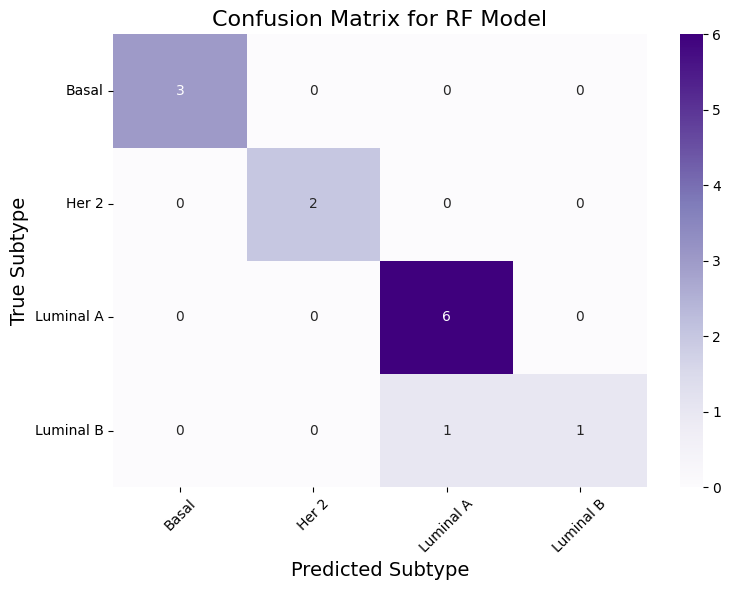

In [21]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rf)
class_labels = np.unique(y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Purples',
    xticklabels=class_labels,
    yticklabels=class_labels,
    cbar=True
)

plt.title('Confusion Matrix for RF Model', fontsize=16)
plt.ylabel('True Subtype', fontsize=14)
plt.xlabel('Predicted Subtype', fontsize=14)

plt.tick_params(axis='x', rotation=45)
plt.tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.savefig('RF_Confusion_Matrix_Heatmap.png', dpi=300)
plt.show()

Feature Importance

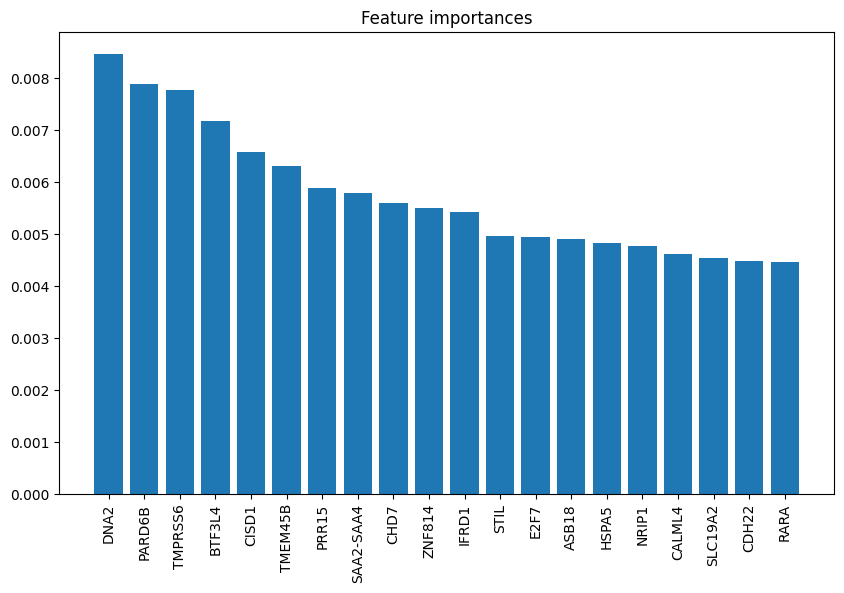

In [22]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature importances")
plt.bar(range(20), importances[indices][:20])
plt.xticks(range(20), [common_genes[i] for i in indices[:20]], rotation=90)
plt.show()

KNN Classifier

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [28]:
# Impute missing values (mean strategy is common for gene expression)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# This step standardizes the data to have a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Initialize and train the KNN classifier (k=5 is a common default)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

Evaluate Model

In [29]:
y_pred_knn = knn.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

Accuracy: 0.9230769230769231
Confusion Matrix:
 [[3 0 0 0]
 [0 2 0 0]
 [0 0 6 0]
 [0 0 1 1]]
Classification Report:
               precision    recall  f1-score   support

       Basal       1.00      1.00      1.00         3
       Her 2       1.00      1.00      1.00         2
   Luminal A       0.86      1.00      0.92         6
   Luminal B       1.00      0.50      0.67         2

    accuracy                           0.92        13
   macro avg       0.96      0.88      0.90        13
weighted avg       0.93      0.92      0.91        13



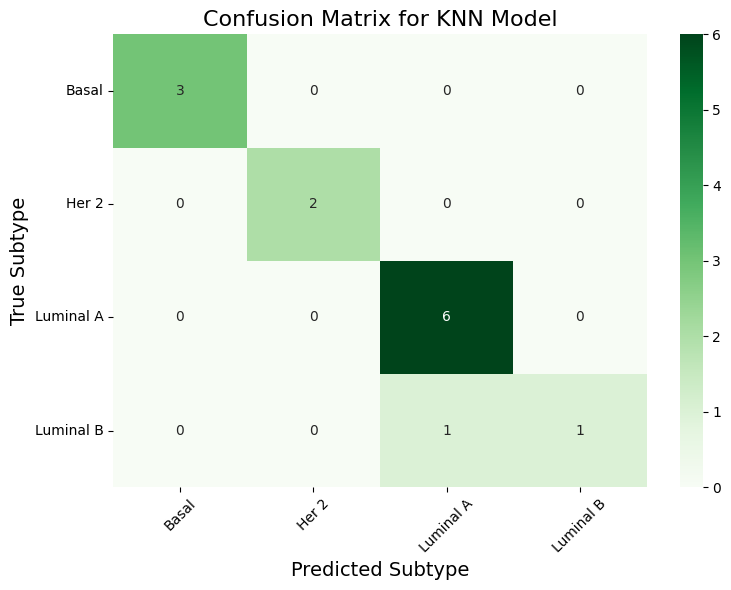

In [30]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_knn)
class_labels = np.unique(y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Greens',
    xticklabels=class_labels,
    yticklabels=class_labels,
    cbar=True
)

plt.title('Confusion Matrix for KNN Model', fontsize=16)
plt.ylabel('True Subtype', fontsize=14)
plt.xlabel('Predicted Subtype', fontsize=14)

plt.tick_params(axis='x', rotation=45)
plt.tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.savefig('KNN_Confusion_Matrix_Heatmap.png', dpi=300)
plt.show()

Permutation Importance

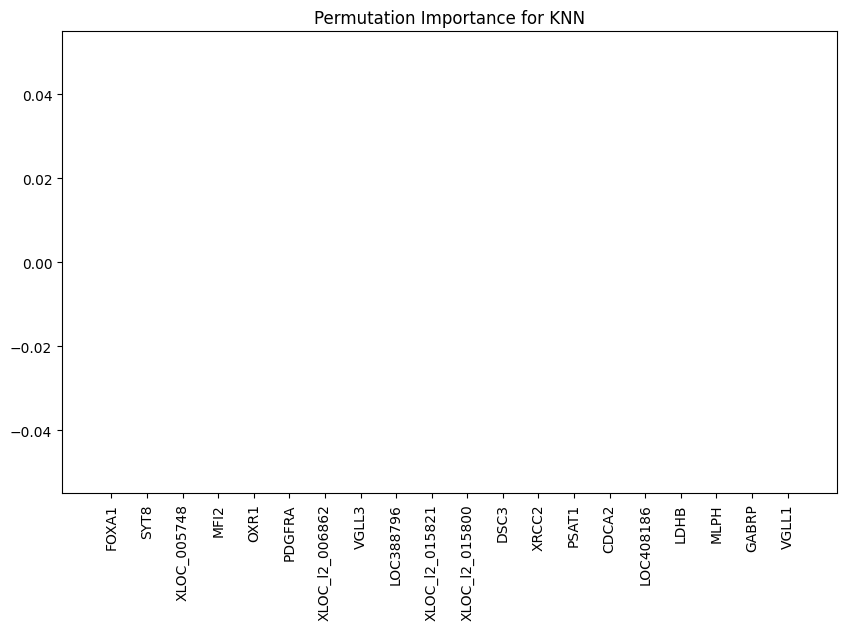

In [27]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

result = permutation_importance(knn, X_test_scaled, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()[::-1]

plt.figure(figsize=(10,6))
plt.title("Permutation Importance for KNN")
plt.bar(range(20), result.importances_mean[sorted_idx][:20])
plt.xticks(range(20), [common_genes[i] for i in sorted_idx[:20]], rotation=90)
plt.show()

Comparision Between Two Models

In [ ]:
# For Random Forest
rf_importances = model.feature_importances_  # model = your fitted RandomForestClassifier
rf_importance_dict = dict(zip(common_genes, rf_importances))

In [ ]:
# For KNN (result from permutation_importance step)
knn_perm_importances = result.importances_mean  # result = output from permutation_importance()
knn_perm_importance_dict = dict(zip(common_genes, knn_perm_importances))

In [ ]:
import pandas as pd

importance_comparison = pd.DataFrame({
    'Gene': common_genes,
    'RF_Importance': rf_importances,
    'KNN_Permutation_Importance': knn_perm_importances
})

importance_comparison = importance_comparison.sort_values(by='RF_Importance', ascending=False).reset_index(drop=True)

print(importance_comparison.head(20))

In [ ]:
identical = all(rf_importances == knn_perm_importances)
print("Are RF and KNN importances identical?", identical)

In [ ]:
from matplotlib_venn import venn2

rf_top = set(importance_comparison.sort_values('RF_Importance', ascending=False).head(20)['Gene'])
knn_top = set(importance_comparison.sort_values('KNN_Permutation_Importance', ascending=False).head(20)['Gene'])

venn2([rf_top, knn_top], set_labels=('Random Forest', 'KNN'))

Robust Biomarkers

In [ ]:
rf_top = set(importance_comparison.sort_values('RF_Importance', ascending=False).head(20)['Gene'])
knn_top = set(importance_comparison.sort_values('KNN_Permutation_Importance', ascending=False).head(20)['Gene'])

robust_biomarkers = rf_top & knn_top
print("Robust (both models):", robust_biomarkers)

all_candidate_biomarkers = rf_top | knn_top
print("All candidates (either model):", all_candidate_biomarkers)